In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from config import *
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator


In [2]:
# search 1
fname = OUTPUT_FILES+"/search_1/temporal_scopus_2011_2021.csv"
fname2 = OUTPUT_FILES+"/search_1/temporal_ieee_2011_2021.csv"
fname3 = OUTPUT_FILES+"/search_1/acm_search_1.csv"
fname4 = OUTPUT_FILES+"/search_1/ScienceDirect_search_1_temporal.csv"
fname5 = OUTPUT_FILES+"/search_1/temporal_acm_sigchi.csv"

In [3]:
df_scopus = pd.read_csv(fname)
df_ieee = pd.read_csv(fname2)
df_acm = pd.read_csv(fname3)
df_sd = pd.read_csv(fname4)
df_sigchi = pd.read_csv(fname5)

In [4]:
# search 2

fname2_sc = OUTPUT_FILES+"/search_2/ieee_search_2.csv"
fname3_sc = OUTPUT_FILES+"/search_2/acm_search_2.csv"
fname4_sc = OUTPUT_FILES+"/search_2/temporal_science_direct_2011_2021.csv"
fname5_sc = OUTPUT_FILES+"/search_2/sigchi_search_2.csv"

In [5]:
df_ieee_sc = pd.read_csv(fname2_sc)
df_acm_sc = pd.read_csv(fname3_sc)
df_sd_sc = pd.read_csv(fname4_sc)
df_sigchi_sc = pd.read_csv(fname5_sc)

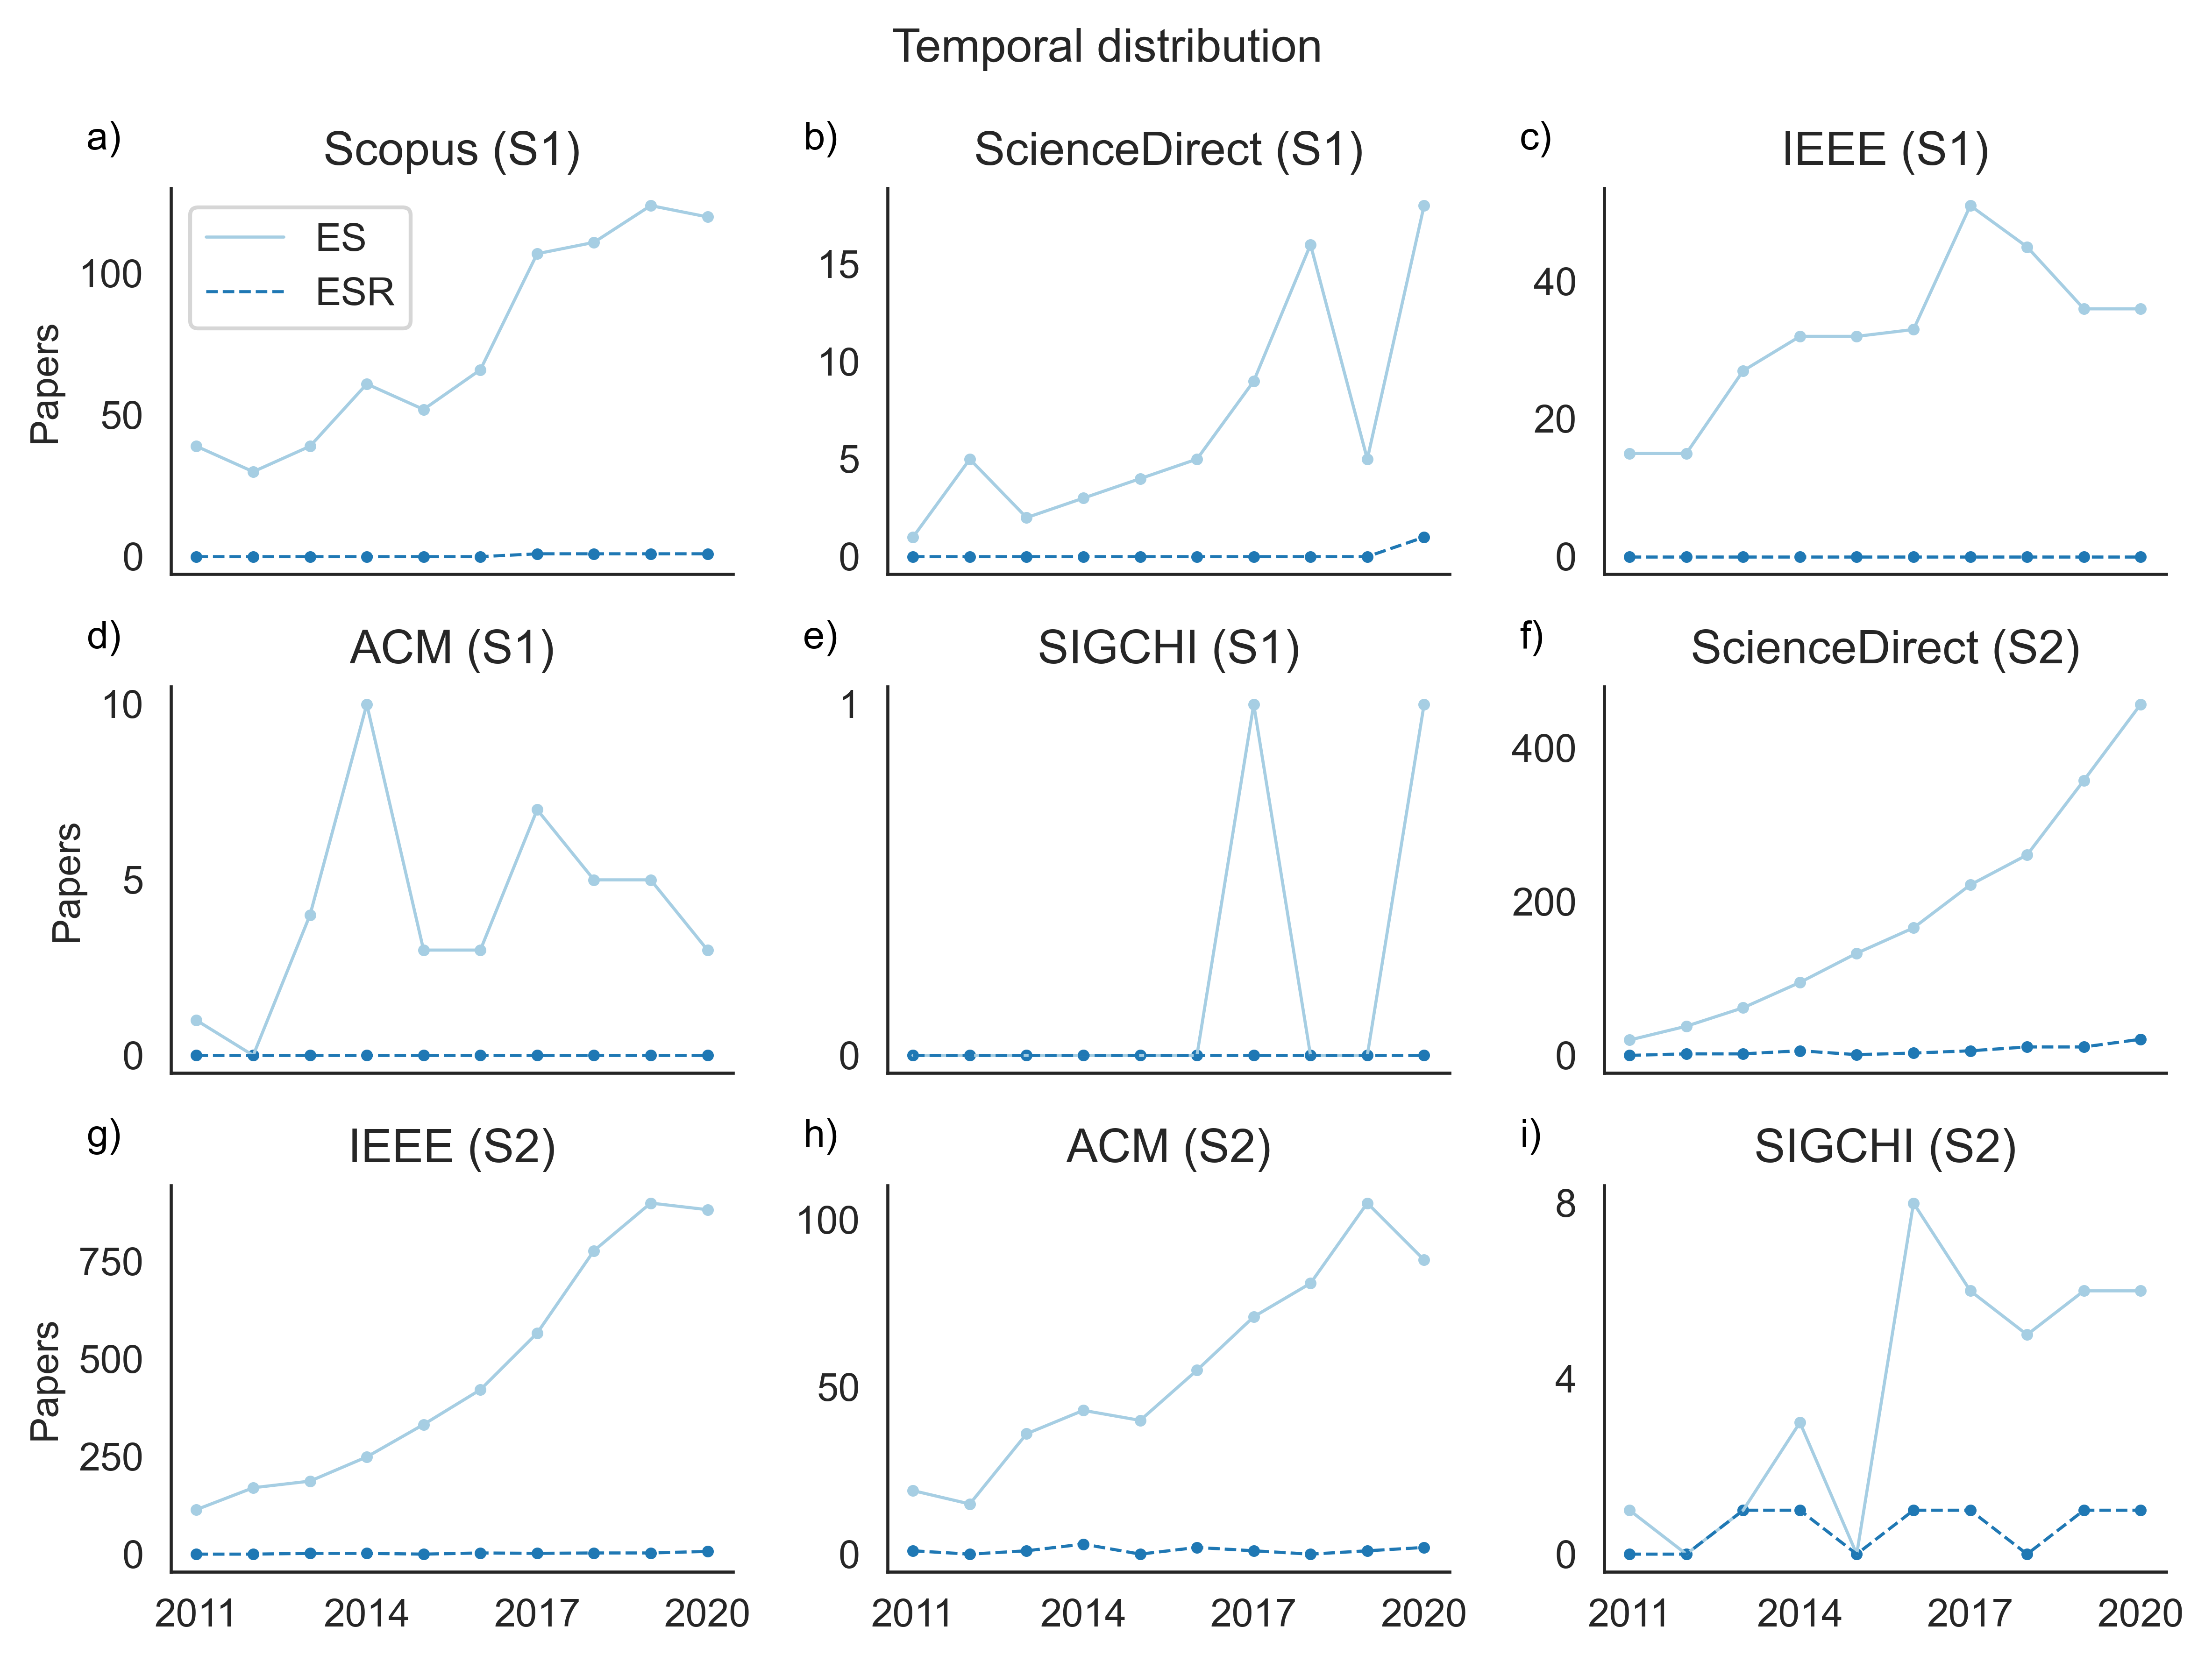

In [12]:
cmap = plt.get_cmap('Paired')
linewidth = 0.8

sns.set_style('white')

plt.close()
plt.figure(figsize=(8, 6), dpi=600)
ax = plt.gca()
gs = gridspec.GridSpec(3, 3)
posCord = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2)]
databases = ["Scopus (S1)", "ScienceDirect (S1)", "IEEE (S1)", "ACM (S1)",
             "SIGCHI (S1)", "ScienceDirect (S2)", "IEEE (S2)", "ACM (S2)", 
             "SIGCHI (S2)"]
annots = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)']
databases_df = [df_scopus, df_sd, df_ieee, df_acm, df_sigchi,
               df_sd_sc, df_ieee_sc, df_acm_sc, df_sigchi_sc]
for df, database in zip(databases_df, databases):
    index = databases.index(database)
    ax = plt.subplot(gs[posCord[index][0], posCord[index][1]])
    ax.text(-0.15, 1.1, annots[index], transform=ax.transAxes, size=10, color='black')
    
    es = df[df['search'] == 'ES']
    esr = df[df['search'] == 'ESR']
    years = es['year'].tolist()
    x = [i.split('-')[0] for i in years]
    
    es_num = es['count'].tolist()
    esr_num = esr['count'].tolist()
    
    if index == 0:
        plt.plot(x, es_num, color = cmap(0), linestyle='solid', linewidth=linewidth, label='ES')
        plt.plot(x, esr_num, color = cmap(1), linestyle='dashed', linewidth=linewidth, label='ESR')
        plt.legend(loc='upper left')
    else:
        plt.plot(x, es_num, color = cmap(0), linestyle='solid', linewidth=linewidth)
        plt.plot(x, esr_num, color = cmap(1), linestyle='dashed', linewidth=linewidth)
    
    plt.scatter(x, es_num, color = cmap(0), s=4)
    plt.scatter(x, esr_num, color = cmap(1), s=4)
    
    plt.xticks(x[::3], x[::3])
    
    if index%3==0:
        plt.ylabel("Papers")
        
    if index ==4:
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    if database == "SIGCHI (S2)":
        plt.yticks(list(range(0,9)), [0,'','','',4,'','','',8])
    if index<6:
        plt.xticks([], [])
        
    plt.title(database)
    sns.despine()

plt.suptitle('Temporal distribution')
plt.tight_layout()
plt.savefig('final_images/panel_image_search_1_2_v2.png', bbox_inches='tight')
plt.show()

# All sets

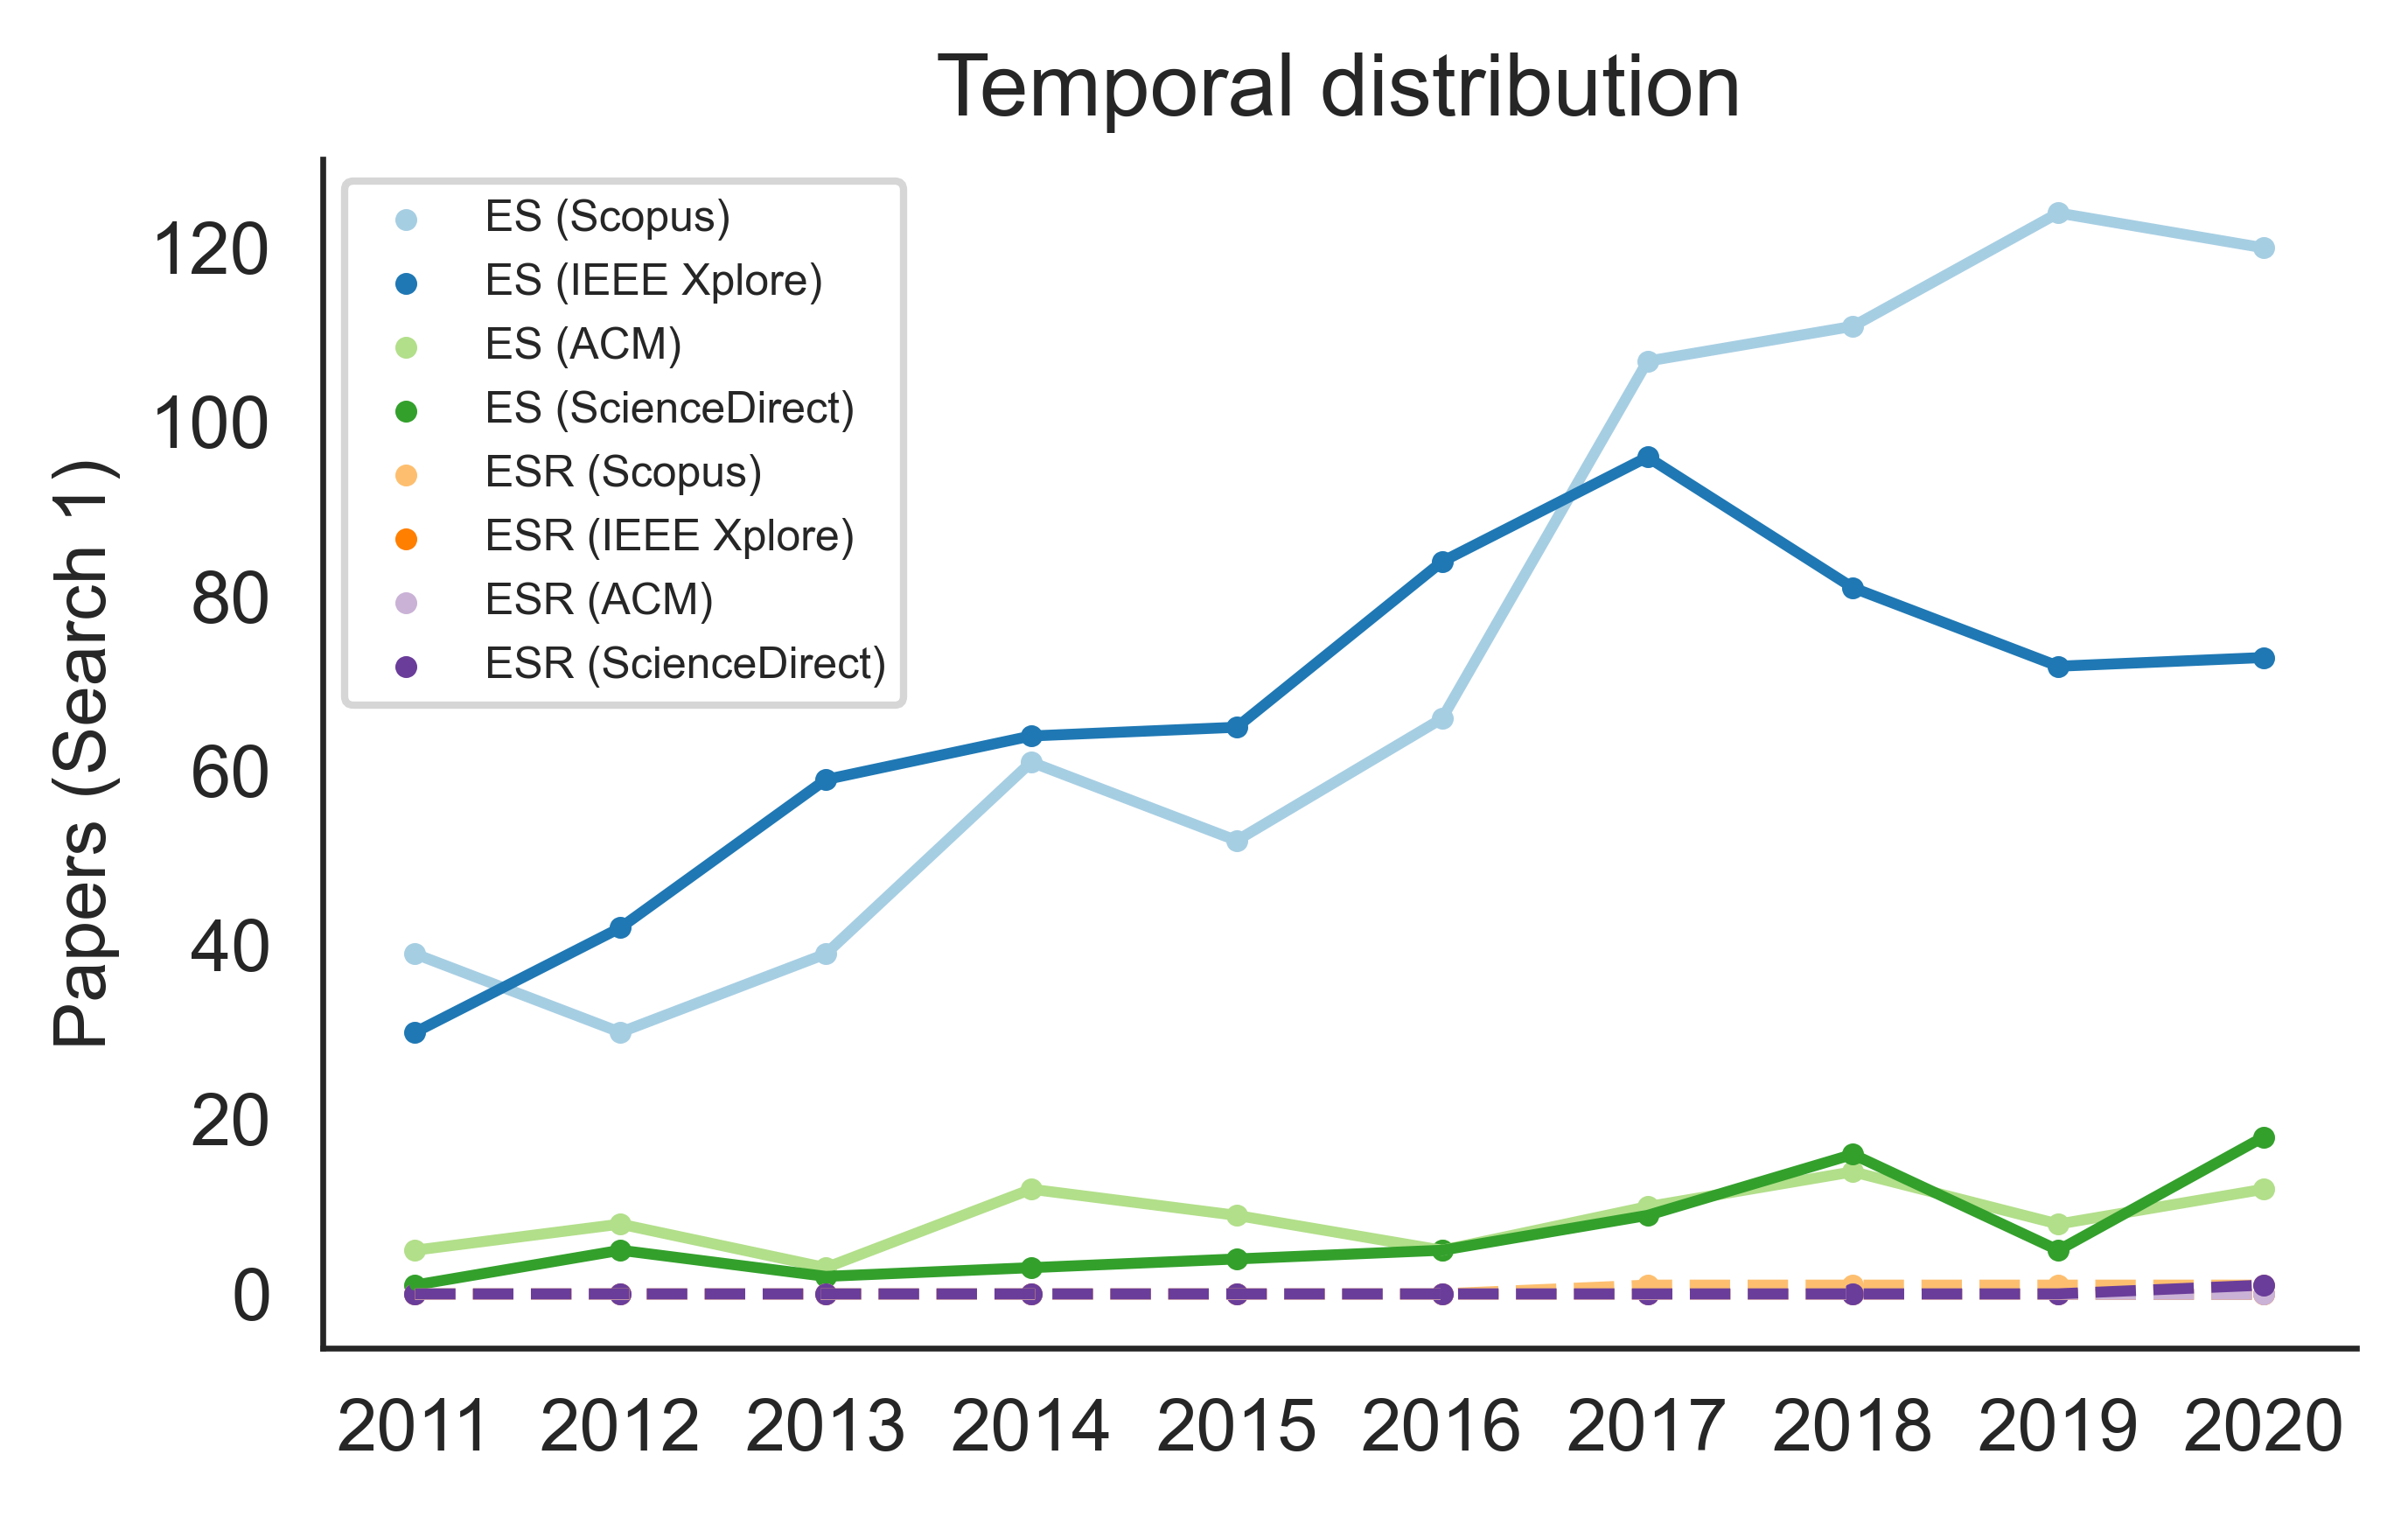

In [65]:
cmap = plt.get_cmap('Paired')
fsize = 7
ssize = 4
sns.set_style('white')

plt.close()
plt.subplots(figsize=(5,3), dpi=600)

for index, label, linestyle in zip( [0, 6], ['ES', 'ESR'], ['solid', 'dashed']):
    t_df = df[df['search'] == label]
    t_df_ieee = df2[df2['search'] == label]
    t_df_acm = df3[df3['search'] == label]
    t_df_sd = df4[df4['search'] == label]
    
    club_year = t_df['year'].tolist()
    year = [i.split('-')[0] for i in club_year]
    
    num = t_df['count'].tolist()
    num_ieee = t_df_ieee['count'].tolist()
    num_acm = t_df_acm['count'].tolist()
    num_sd = t_df_sd['count'].tolist()
    
    plt.plot(year, num, color = cmap(index), linestyle=linestyle)
    plt.plot(year, num_ieee, color = cmap(index+1), linestyle=linestyle)
    plt.plot(year, num_acm, color = cmap(index+2), linestyle=linestyle)
    plt.plot(year, num_sd, color = cmap(index+3), linestyle=linestyle)
    
    
    plt.scatter(year, num, label=label + " (Scopus)", color = cmap(index), s = ssize)
    plt.scatter(year, num_ieee, label=label +" (IEEE Xplore)", color = cmap(index+1), s = ssize)
    plt.scatter(year, num_acm, label=label + " (ACM)", color = cmap(index+2), s = ssize)
    plt.scatter(year, num_sd, label=label +" (ScienceDirect)", color = cmap(index+3), s = ssize)

    
#     for i in range(len(club_year)):
#         plt.annotate(num[i], (year[i], num[i] + 15), fontsize=fsize)
#         plt.annotate(num_ieee[i], (year[i], num_ieee[i] + 5), fontsize=fsize)
        
plt.title("Temporal distribution")
plt.ylabel("Papers (Search 1)")
plt.legend(loc='upper left', prop={'size': 6})
# plt.ylim(None, 280)
sns.despine()

plt.savefig("output_images/temporal_distribution_4.png", bbox_inches='tight')
plt.show()


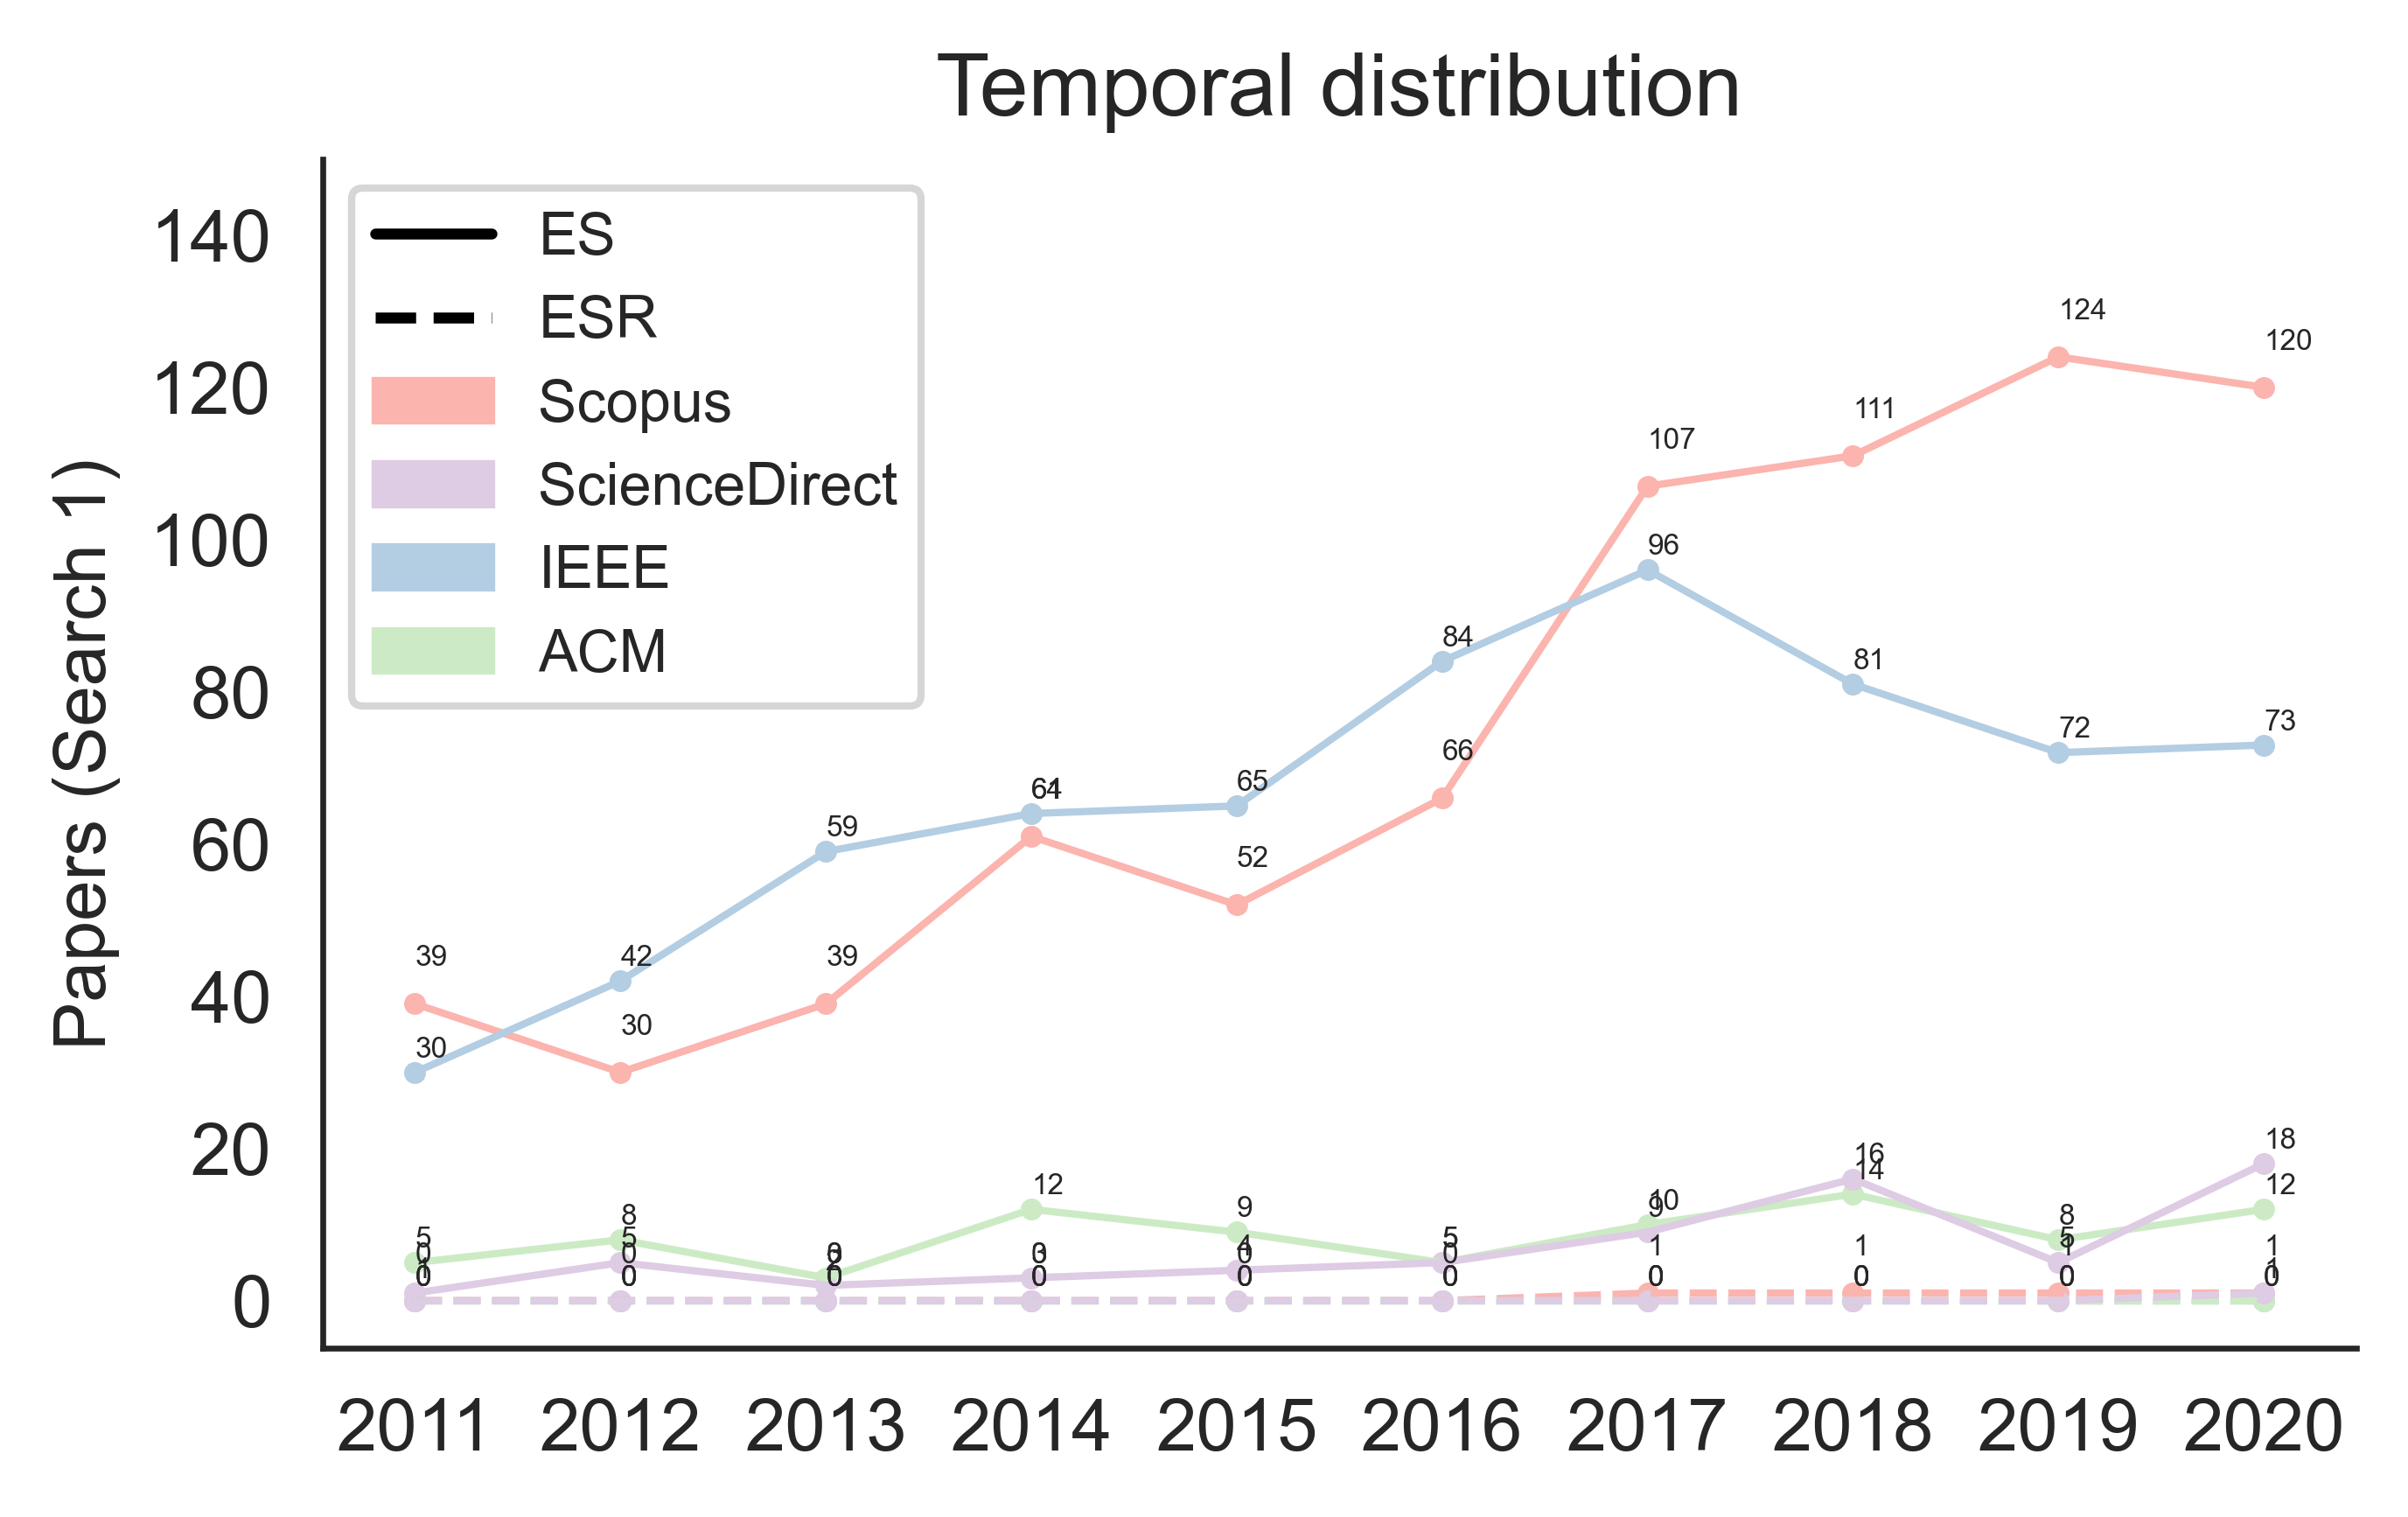

In [72]:
cmap = plt.get_cmap('Pastel1')
fsize = 4
ssize = 4
linewidth=1
sns.set_style('white')

plt.close()
plt.subplots(figsize=(5,3), dpi=600)

for index, label, linestyle in zip( [0, 0], ['ES', 'ESR'], ['solid', 'dashed']):
    t_df = df[df['search'] == label]
    t_df_ieee = df2[df2['search'] == label]
    t_df_acm = df3[df3['search'] == label]
    t_df_sd = df4[df4['search'] == label]
    
    club_year = t_df['year'].tolist()
    year = [i.split('-')[0] for i in club_year]
    
    num = t_df['count'].tolist()
    num_ieee = t_df_ieee['count'].tolist()
    num_acm = t_df_acm['count'].tolist()
    num_sd = t_df_sd['count'].tolist()
    
    plt.plot(year, num, color = cmap(index), linestyle=linestyle, linewidth=linewidth)
    plt.plot(year, num_ieee, color = cmap(index+1), linestyle=linestyle, linewidth=linewidth)
    plt.plot(year, num_acm, color = cmap(index+2), linestyle=linestyle, linewidth=linewidth)
    plt.plot(year, num_sd, color = cmap(index+3), linestyle=linestyle, linewidth=linewidth)
    
    
    plt.scatter(year, num, color = cmap(index), s = ssize)
    plt.scatter(year, num_ieee, color = cmap(index+1), s = ssize)
    plt.scatter(year, num_acm, color = cmap(index+2), s = ssize)
    plt.scatter(year, num_sd, color = cmap(index+3), s = ssize)
    
    if label == 'ES':
        patch_scopus = mpatches.Patch(color=cmap(index), label='Scopus') 
        patch_ieee = mpatches.Patch(color=cmap(index+1), label='IEEE')  
        patch_acm = mpatches.Patch(color=cmap(index+2), label='ACM')  
        patch_sd = mpatches.Patch(color=cmap(index+3), label='ScienceDirect')  



    
    for i in range(len(club_year)):
        plt.annotate(num[i], (year[i], num[i] + 5), fontsize=fsize)
        plt.annotate(num_ieee[i], (year[i], num_ieee[i] + 2), fontsize=fsize)
        plt.annotate(num_acm[i], (year[i], num_acm[i] + 2), fontsize=fsize)
        plt.annotate(num_sd[i], (year[i], num_sd[i] + 2), fontsize=fsize)
        
handles, labels = plt.gca().get_legend_handles_labels()

#  
line1 = Line2D([0], [0], label='ES', color='k', linestyle='solid')
line2 = Line2D([0], [0], label='ESR', color='k', linestyle='dashed')
handles.extend([line1, line2, patch_scopus, patch_sd, patch_ieee, patch_acm ])

plt.legend(handles=handles, loc='upper left', prop={'size': 8})    

plt.title("Temporal distribution")
plt.ylabel("Papers (Search 1)")
# plt.legend(loc='upper left', prop={'size': 6})
plt.ylim(None, 150)
sns.despine()

plt.savefig("output_images/temporal_distribution_5.png", bbox_inches='tight')
plt.show()


In [ ]:
plt.close()
plt.subplots(figsize=(5,3), dpi=600)

for label in ['ES', 'ESR']:
    t_df = df[df['search'] == label]
    club_year = t_df['year'].tolist()
    num = t_df['num'].tolist()
    num_norm = t_df['num'].tolist()
    year = [i.split('-')[0] for i in club_year]
    
    plt.plot(year, num_norm)
    plt.scatter(year, num_norm, label=label)
    for i in range(len(club_year)):
        plt.annotate(num[i], (year[i], num_norm[i] + 10))
plt.title("Scopus (Search 1)")
plt.ylabel("Numbers of papers")
plt.legend(loc='upper left')
plt.ylim(None, 280)
plt.show()

In [13]:
df_energy = df[df['search'] == 'E']
df_energy_rebound = df[df['search'] == 'ER']
df_rebound_in_energy = df_energy[['year', 'search', 'num']].merge(df_energy_rebound[['year', 'search', 'num']], on='year')
df_rebound_in_energy['RinE'] = (df_rebound_in_energy['num_y']*100)/df_rebound_in_energy['num_x']

In [14]:
df_es = df[df['search'] == 'ES']
df_esr = df[df['search'] == 'ESR']
df_rebound_in_es = df_es[['year', 'search', 'num']].merge(df_esr[['year', 'search', 'num']], on='year')
df_rebound_in_es['RinES'] = (df_rebound_in_es['num_y']*100)/df_rebound_in_es['num_x']

In [15]:
equations_df = df_rebound_in_energy[['year', 'RinE']].merge(df_rebound_in_es[['year', 'RinES']], on='year')

In [16]:
cmap = plt.get_cmap("Paired")

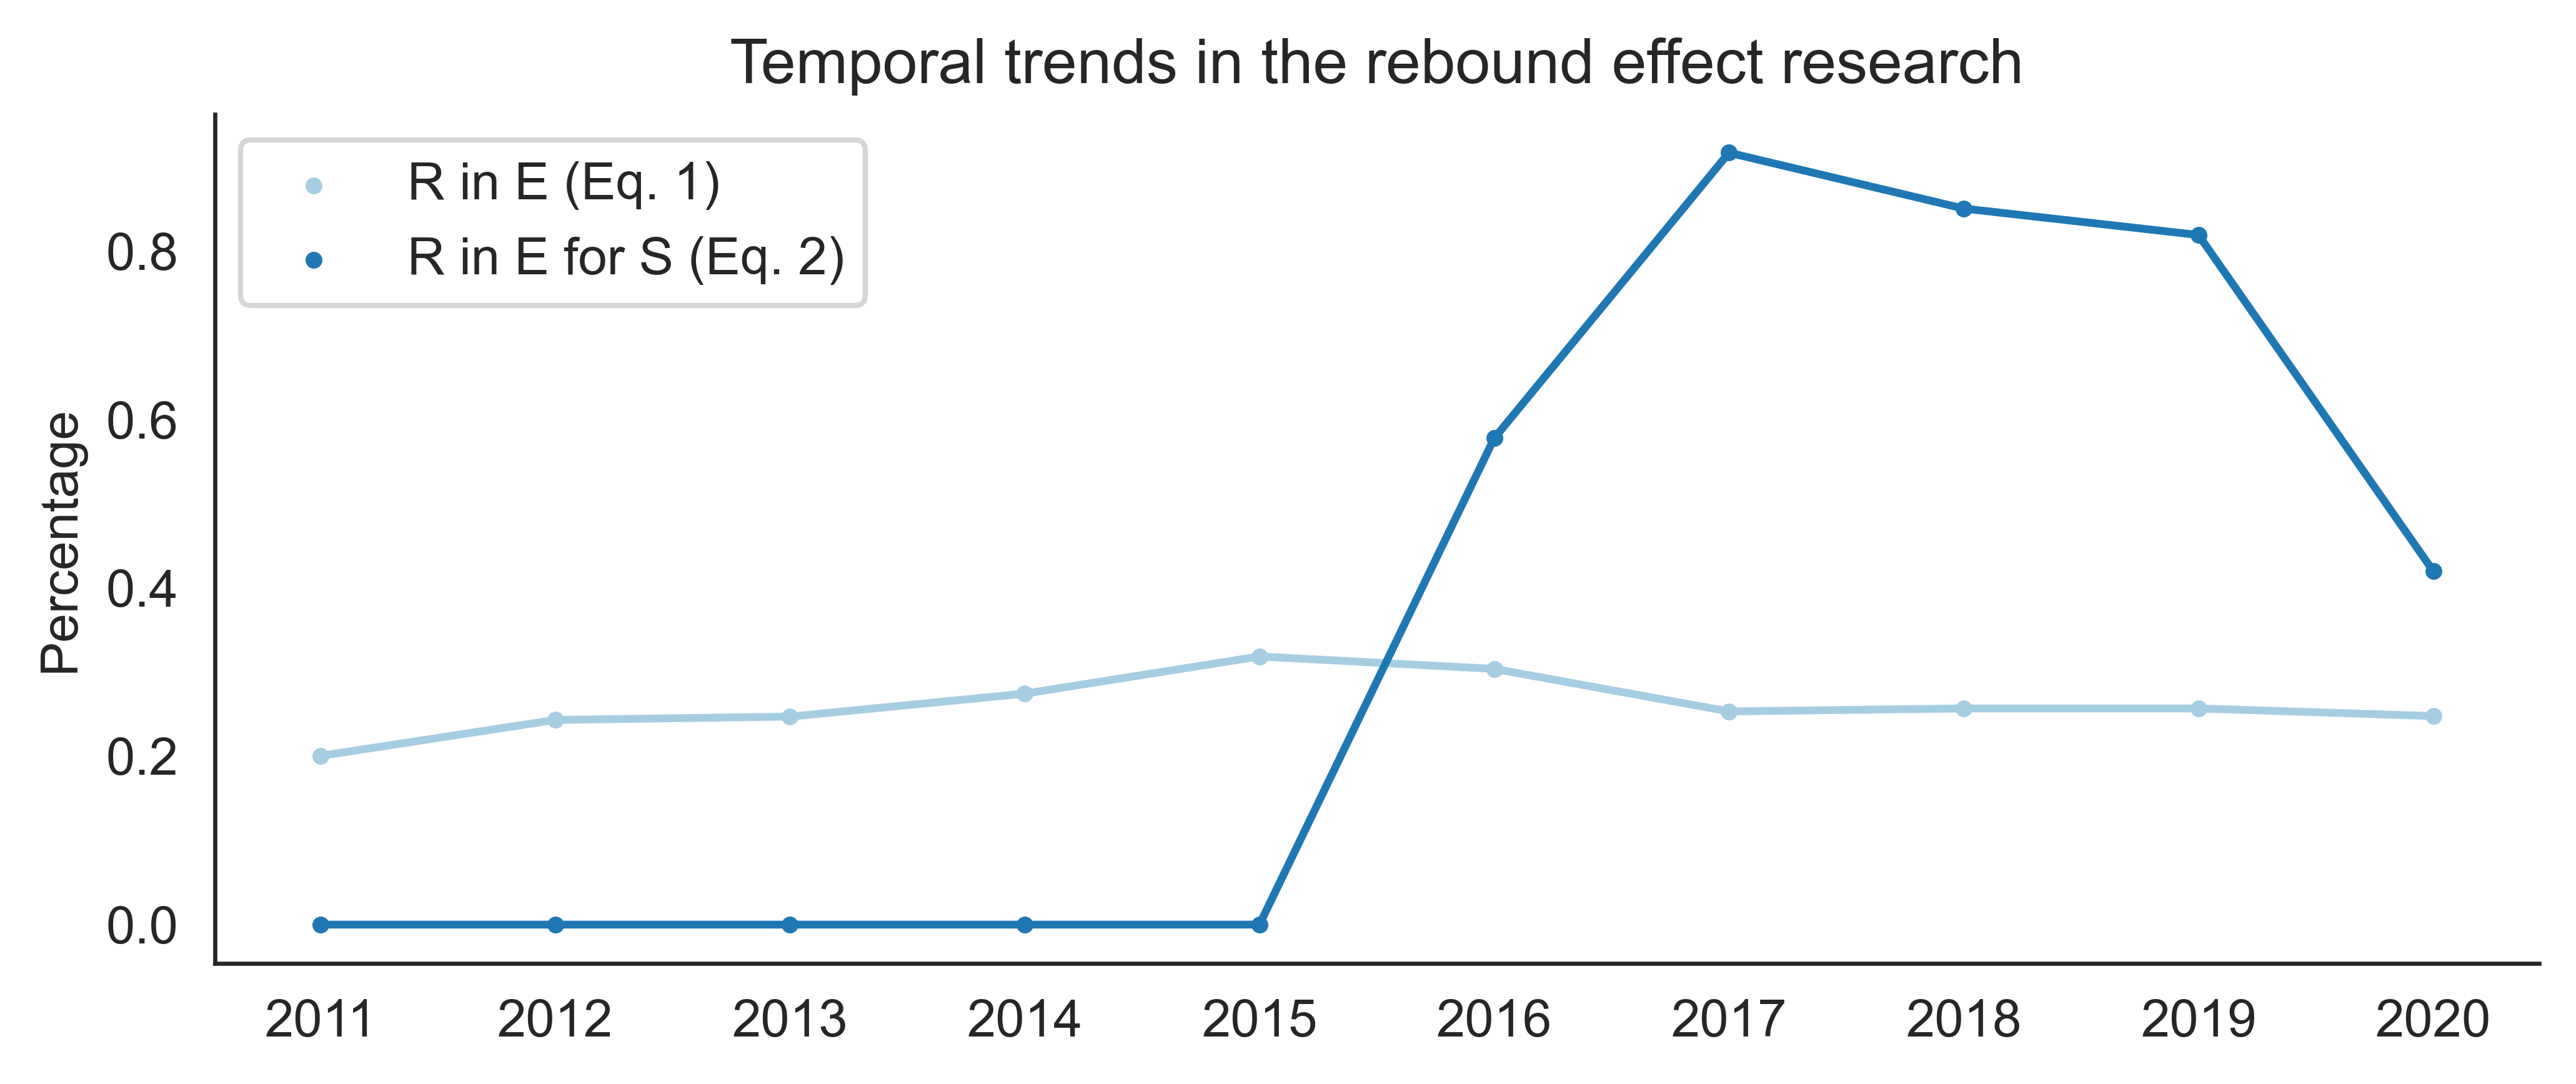

In [17]:
plt.close()
sns.set_style("white")

plt.subplots(figsize = (8,3), dpi=600)
x = [i.split('-')[0] for i in equations_df['year'].tolist()]

plt.plot(x, equations_df['RinE'], color=cmap(0))
plt.plot(x, equations_df['RinES'], color=cmap(1))
plt.scatter(x, equations_df['RinE'], label='R in E (Eq. 1)', color=cmap(0), s=5, marker='o')
plt.scatter(x, equations_df['RinES'], label='R in E for S (Eq. 2)', color=cmap(1), s=5, marker='o')

plt.legend(loc='upper left')
plt.ylabel("Percentage")
plt.title('Temporal trends in the rebound effect research')
sns.despine()

plt.show()

In [18]:
equations_df

,year,RinE,RinES
0,2011-2012,0.200510,0.000000
1,2012-2013,0.243270,0.000000
2,2013-2014,0.247214,0.000000
3,2014-2015,0.274521,0.000000
4,2015-2016,0.318732,0.000000
5,2016-2017,0.303943,0.578035
6,2017-2018,0.253378,0.917431
7,2018-2019,0.256900,0.851064
8,2019-2020,0.256917,0.819672
9,2020-2021,0.247916,0.420168


In [19]:
s = """[[[Title: “energy efficient"] OR [Title: “energy efficiency"]] AND [[Title: “smart home"] OR [Title: “smart homes"]]] OR [[[Abstract: “energy efficient"] OR [Abstract: “energy efficiency"]] AND [[Abstract: “smart home"] OR [Abstract: “smart homes"]]] OR [[[Keywords: “energy efficient"] OR [Keywords: “energy efficiency"]] AND [[Keywords: “smart home"] OR [Keywords: “smart homes"]]]"""

In [20]:
s.replace("[", "(").replace("]", ")")

'(((Title: “energy efficient") OR (Title: “energy efficiency")) AND ((Title: “smart home") OR (Title: “smart homes"))) OR (((Abstract: “energy efficient") OR (Abstract: “energy efficiency")) AND ((Abstract: “smart home") OR (Abstract: “smart homes"))) OR (((Keywords: “energy efficient") OR (Keywords: “energy efficiency")) AND ((Keywords: “smart home") OR (Keywords: “smart homes")))'

In [ ]:
(
    (
        (Title: "energy efficient") OR (Title: "energy efficiency")
    ) AND (
        (Title: "smart home") OR (Title: "smart homes")
    )
) OR (
    (
        (Abstract: "energy efficient") OR (Abstract: "energy efficiency")
    ) AND (
        (Abstract: "smart home") OR (Abstract: "smart homes")
    )
) OR (
    (
        (Keyword: "energy efficient") OR (Keyword: "energy efficiency")
    ) AND (
        (Keyword: "smart home") OR (Keyword: "smart homes")
    )
)

In [ ]:
TITLE-ABS-KEY ( "energy efficien*" AND "smart home*" AND ( "rebound effect*" OR "jevons paradox" OR "khartoum-brookes postulate" ) )